## Titanic Dataset EDA

In [194]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [196]:
df=sns.load_dataset('titanic')

In [198]:
df.shape

(891, 15)

In [200]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [204]:
df['sex']=df['sex'].map({'male':1 , 'female':0})

In [206]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int64   
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(5), object(4)
memory usage: 80.7+ KB


In [210]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### few observations
1. there are missing values in age , emabrked,embarked town,deck
2. more than 70 percent of deck values are missing , will have to drop
3. few columns have inappropriate datatype

In [213]:
df.drop(['deck'],axis=1,inplace=True)

In [215]:
# inputing missing values for age with mean
df['age'].fillna(df['age'].mean(), inplace=True)

C:\Users\mysti\AppData\Local\Temp\ipykernel_9028\355711421.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [217]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [219]:
df['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [221]:
## since we have maximum S values so we will replace the 2 missing values with S
df.fillna({'embarked': 'S'}, inplace=True)

In [223]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [225]:
## similarly for embark_town
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [227]:
## we have max values for Southampton so we will replace 2 missing values by southampton
df.fillna({'embark_town':'Southampton'},inplace=True)

In [229]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int64   
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(5), object(4)
memory usage: 79.4+ KB


#### changing data type for
1. survived(category)
2. pclass(category)
3. sex(category)
4. age(int)
5. embarked(category)

In [234]:
df['survived']=df['survived'].astype('category')
df['pclass']=df['pclass'].astype('category')
df['sex']=df['sex'].astype('category')
df['age']=df['age'].astype('int')


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    category
 1   pclass       891 non-null    category
 2   sex          891 non-null    category
 3   age          891 non-null    int32   
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(4), float64(1), int32(1), int64(2), object(4)
memory usage: 58.1+ KB


In [238]:
df.describe()

,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.544332,0.523008,0.381594,32.204208
std,13.013778,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


out of 891, 62 % people died in the accident


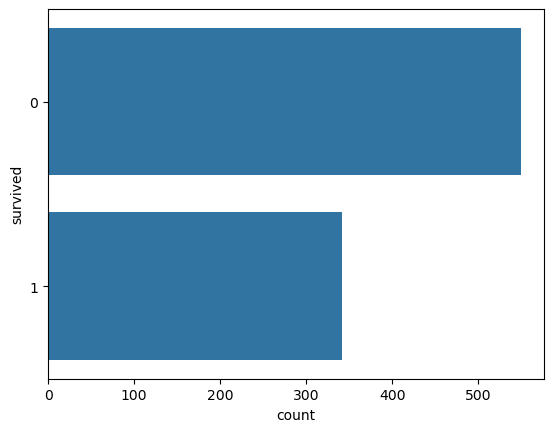

In [240]:
## univariate analysis
## survived column
sns.countplot(df['survived'],)
death_percent=round(df['survived'].value_counts().values[0]/891*100)
print('out of 891, {} % people died in the accident'.format(death_percent))

pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='pclass'>

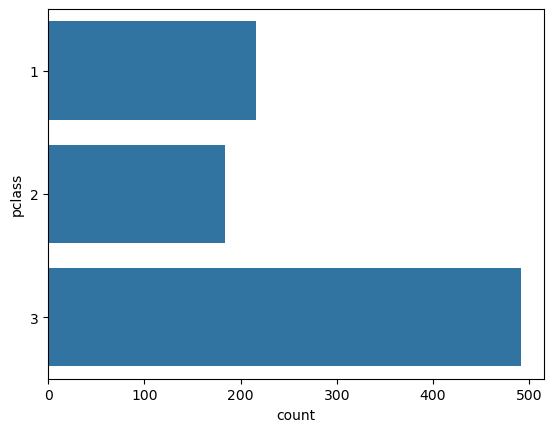

In [242]:
## pclass column
print((df['pclass'].value_counts()/891)*100)
sns.countplot(df['pclass'])
## pclass was most crowded class

sex
1    64.758698
0    35.241302
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='sex'>

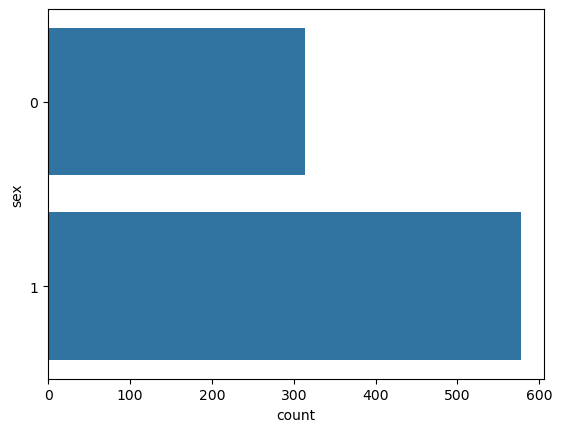

In [244]:
print((df['sex'].value_counts()/891)*100)
sns.countplot(df['sex'])

0.45956263424701577
0.9865867453652877


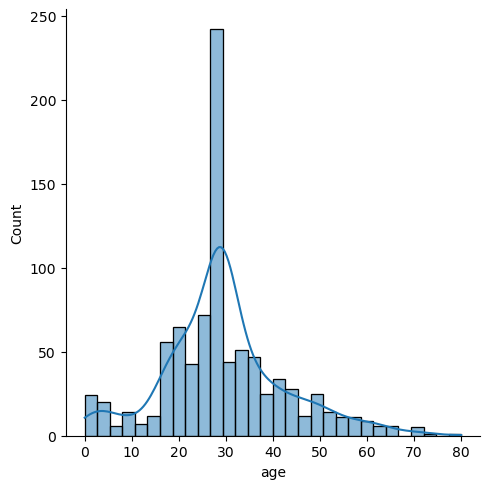

In [246]:
## age column
sns.displot(df['age'] , kde = True)
print(df['age'].skew())
print(df['age'].kurt())

<Axes: ylabel='age'>

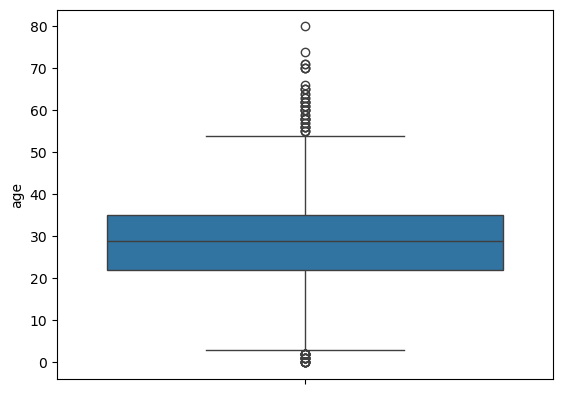

In [248]:
sns.boxplot(df['age'])

### conclusions 
1. age can be considered as normal distribution for all practical purposes
2. more analysis required for outlier detection

<Figure size 1500x600 with 0 Axes>

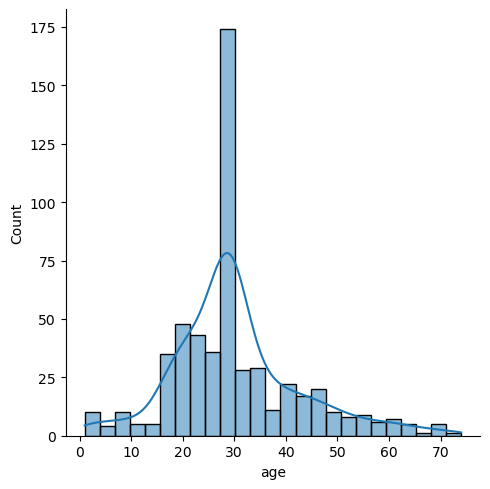

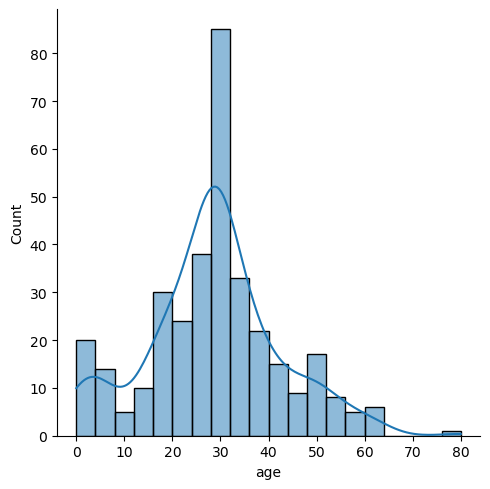

In [251]:
## multivariate analysis
# survival with age
plt.figure(figsize=(15,6))
sns.displot(df[df['survived']==0]['age'],kde=True)
sns.displot(df[df['survived']==1]['age'],kde=True)


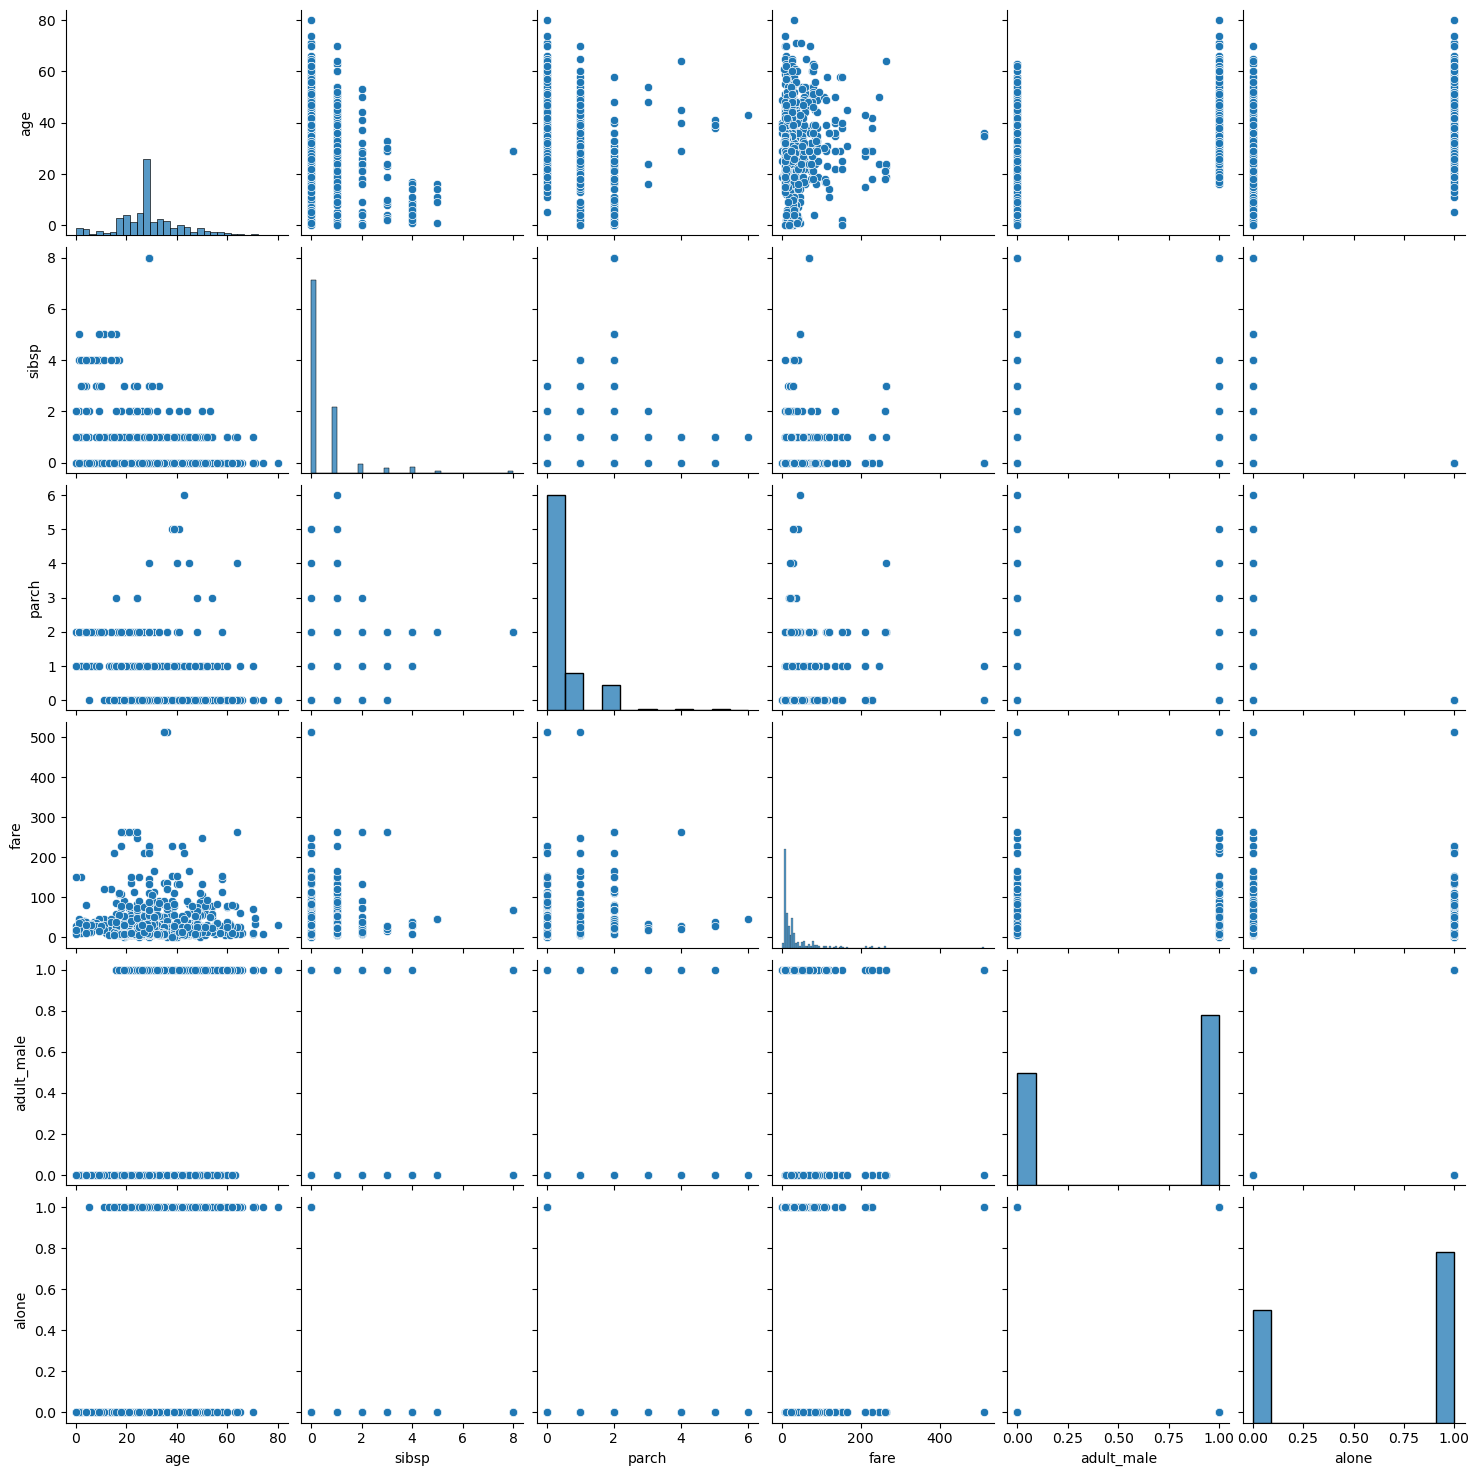

In [253]:
sns.pairplot(df)